In [35]:
#Importing Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import sklearn
from scipy.stats import kurtosis
from scipy.stats import skew
import seaborn as sns  
import numpy as np

In [36]:
# Getting data from google drive
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/My Drive/temp/

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/temp


In [37]:
#Reading file from local system
db = pd.read_excel('fdb1.xlsx') 
data = db.values

In [38]:
# Time cloumn delete
dt=db.drop('Time',axis=1)

#Null values delete
dta = dt.dropna()

#Time replacement for x-axis
df = pd.DataFrame(data=dta)

#First 5 rows
df.head()

,INPUT_01,INPUT_02,INPUT_03,INPUT_04,INPUT_05,TYPE_A_SENSOR_01,TYPE_A_SENSOR_02,TYPE_A_SENSOR_03,TYPE_A_SENSOR_04,TYPE_A_SENSOR_05,TYPE_B_SENSOR_01,TYPE_B_SENSOR_02,TYPE_C_SENSOR
0,9.6,30.4,38.4,46.4,51.2,2.568375,4.893925,2.989600,1.199225,1.262350,25.0,25.0,2.483973
1,9.6,30.4,38.4,46.4,51.2,2.564300,4.886450,2.984250,1.197650,1.263050,25.0,25.0,2.530820
2,9.6,30.4,38.4,46.4,51.2,2.563625,4.884875,2.983000,1.198200,1.263500,25.0,25.0,2.501597
3,9.6,30.4,38.4,46.4,51.2,2.570989,4.893233,2.988322,1.197800,1.256144,25.0,25.0,2.514373
4,9.6,30.4,38.4,46.4,51.2,2.559262,4.857075,2.972113,1.187375,1.241988,25.0,25.0,2.517045


In [39]:
sensor_names = ['a_sensor','b_sensor','c_sensor']

In [40]:
sensor_fields = [5,2,1]

In [41]:
#Store Sensor values in an array with 
input_data = []
output_type = {sensor:[] for sensor in sensor_names}

for x in dta.iloc[:,0:5].to_numpy().T:
  input_data.append(x)

for x in dta.iloc[:,5:10].to_numpy().T:
  output_type['a_sensor'].append(x)

for x in dta.iloc[:,10:12].to_numpy().T:
  output_type['b_sensor'].append(x)

for x in dta.iloc[:,12:].to_numpy().T:
  output_type['c_sensor'].append(x)


In [42]:
# Time Domain Running window Statistical Features Extraction Functions

def running_mean(window, vector):
    temp_list = []
    for i in range(0,len(vector)):
        if len(vector[i:window+i]) < window:
            break
        #print(vector[i:window+i])
        temp_list.append(np.mean(vector[i:window+i]))
    
    return temp_list

def running_std(window, vector):
    temp_list = []
    for i in range(0,len(vector)):
        if len(vector[i:window+i]) < window:
            break
        #print(vector[i:window+i])
        temp_list.append(np.std(vector[i:window+i]))
    
    return temp_list

def running_rms(window, vector):
    temp_list = []
    for i in range(0,len(vector)):
        if len(vector[i:window+i]) < window:
            break
        #print(vector[i:window+i])
        temp_list.append(np.sqrt(np.mean(vector[i:window+i]**2)/window))
    
    return temp_list

def running_var(window, vector):
    temp_list = []
    for i in range(0,len(vector)):
        if len(vector[i:window+i]) < window:
            break
        #print(vector[i:window+i])
        temp_list.append((np.std(vector[i:window+i])**2))
    
    return temp_list

def running_kur(window, vector):
    temp_list = []
    for i in range(0,len(vector)):
        if len(vector[i:window+i]) < window:
            break
        #print(vector[i:window+i])
        temp_list.append(kurtosis(vector[i:window+i]))
    
    return temp_list

def running_skew(window, vector):
    temp_list = []
    for i in range(0,len(vector)):
        if len(vector[i:window+i]) < window:
            break
        #print(vector[i:window+i])
        temp_list.append(skew(vector[i:window+i]))
    
    return temp_list



In [43]:
model_names = ['r_m', 'r_std','r_var', 'r_rms', 'r_kur', 'r_skew']

In [44]:
function_order={
    'r_m': running_mean,
    'r_std': running_std,
    'r_var': running_var, 
    'r_rms': running_rms, 
    'r_kur': running_kur, 
    'r_skew': running_skew
}

In [45]:
input_data_list = {}
input_data_array = {}
output_type_list = {}
output_type_array = {}

In [46]:
# input_data_list
for model in model_names:
  input_data_list[model] = []

# input_data_array
for model in model_names:
  input_data_array[model] = []

In [47]:
# output_type_list
for sensor in sensor_names:
  output_type_list[sensor]={}
  for model in model_names:
    output_type_list[sensor][model]=[]

# output_type_array
for sensor in sensor_names:
  output_type_array[sensor] = {}
  for model in model_names:
    output_type_array[sensor][model]=[]  

In [48]:
#run on input_data
for i in range(5):
  for model in function_order:
    input_data_list[model].append(function_order[model](10, input_data[i]))

#run on input_data_array
for i in range(5):
  for model in function_order:
    input_data_array[model].append(np.asarray(input_data_list[model][i]))

In [49]:
#run on sensor_list
def run_functions_on_sensors(sensor, rng):  
  for i in range(rng):
    for model in function_order:
      output_type_list[sensor][model].append(function_order[model](10, output_type[sensor][i]))

In [50]:
#convert to array
def convert_to_array(sensor, rng):
  for i in range(rng):
    for model in function_order:
      output_type_array[sensor][model].append(np.asarray(output_type_list[sensor][model][i]))

In [51]:
for i, sensor in enumerate(sensor_names):
  run_functions_on_sensors(sensor, sensor_fields[i])
  convert_to_array(sensor, sensor_fields[i])

In [52]:
dff = pd.DataFrame()

for i in range(0,5):
    counter = i + 1
    counter = '%02d' % counter
    for model in model_names:
      dff[model+'_INPUT_DATA_'+counter] = input_data_array[model][i]
    
for i,sensor in enumerate(sensor_names):
  for j in range(sensor_fields[i]):
    counter = j + 1
    counter = '%02d' % counter
    for model in model_names:
      dff[model + '_OUTPUT_TYPE_' + sensor +'_' + counter] = output_type_array[sensor][model][j]

In [53]:
dff.shape

(32703, 78)

In [54]:
dff.head()

,r_m_INPUT_DATA_01,r_std_INPUT_DATA_01,r_var_INPUT_DATA_01,r_rms_INPUT_DATA_01,r_kur_INPUT_DATA_01,r_skew_INPUT_DATA_01,r_m_INPUT_DATA_02,r_std_INPUT_DATA_02,r_var_INPUT_DATA_02,r_rms_INPUT_DATA_02,r_kur_INPUT_DATA_02,r_skew_INPUT_DATA_02,r_m_INPUT_DATA_03,r_std_INPUT_DATA_03,r_var_INPUT_DATA_03,r_rms_INPUT_DATA_03,r_kur_INPUT_DATA_03,r_skew_INPUT_DATA_03,r_m_INPUT_DATA_04,r_std_INPUT_DATA_04,r_var_INPUT_DATA_04,r_rms_INPUT_DATA_04,r_kur_INPUT_DATA_04,r_skew_INPUT_DATA_04,r_m_INPUT_DATA_05,r_std_INPUT_DATA_05,r_var_INPUT_DATA_05,r_rms_INPUT_DATA_05,r_kur_INPUT_DATA_05,r_skew_INPUT_DATA_05,r_m_OUTPUT_TYPE_a_sensor_01,r_std_OUTPUT_TYPE_a_sensor_01,r_var_OUTPUT_TYPE_a_sensor_01,r_rms_OUTPUT_TYPE_a_sensor_01,r_kur_OUTPUT_TYPE_a_sensor_01,r_skew_OUTPUT_TYPE_a_sensor_01,r_m_OUTPUT_TYPE_a_sensor_02,r_std_OUTPUT_TYPE_a_sensor_02,r_var_OUTPUT_TYPE_a_sensor_02,r_rms_OUTPUT_TYPE_a_sensor_02,r_kur_OUTPUT_TYPE_a_sensor_02,r_skew_OUTPUT_TYPE_a_sensor_02,r_m_OUTPUT_TYPE_a_sensor_03,r_std_OUTPUT_TYPE_a_sensor_03,r_var_OUTPUT_TYPE_a_sensor_03,r_rms_OUTPUT_TYPE_a_sensor_03,r_kur_OUTPUT_TYPE_a_sensor_03,r_skew_OUTPUT_TYPE_a_sensor_03,r_m_OUTPUT_TYPE_a_sensor_04,r_std_OUTPUT_TYPE_a_sensor_04,r_var_OUTPUT_TYPE_a_sensor_04,r_rms_OUTPUT_TYPE_a_sensor_04,r_kur_OUTPUT_TYPE_a_sensor_04,r_skew_OUTPUT_TYPE_a_sensor_04,r_m_OUTPUT_TYPE_a_sensor_05,r_std_OUTPUT_TYPE_a_sensor_05,r_var_OUTPUT_TYPE_a_sensor_05,r_rms_OUTPUT_TYPE_a_sensor_05,r_kur_OUTPUT_TYPE_a_sensor_05,r_skew_OUTPUT_TYPE_a_sensor_05,r_m_OUTPUT_TYPE_b_sensor_01,r_std_OUTPUT_TYPE_b_sensor_01,r_var_OUTPUT_TYPE_b_sensor_01,r_rms_OUTPUT_TYPE_b_sensor_01,r_kur_OUTPUT_TYPE_b_sensor_01,r_skew_OUTPUT_TYPE_b_sensor_01,r_m_OUTPUT_TYPE_b_sensor_02,r_std_OUTPUT_TYPE_b_sensor_02,r_var_OUTPUT_TYPE_b_sensor_02,r_rms_OUTPUT_TYPE_b_sensor_02,r_kur_OUTPUT_TYPE_b_sensor_02,r_skew_OUTPUT_TYPE_b_sensor_02,r_m_OUTPUT_TYPE_c_sensor_01,r_std_OUTPUT_TYPE_c_sensor_01,r_var_OUTPUT_TYPE_c_sensor_01,r_rms_OUTPUT_TYPE_c_sensor_01,r_kur_OUTPUT_TYPE_c_sensor_01,r_skew_OUTPUT_TYPE_c_sensor_01
0,9.600000,2.808667e-15,7.888609e-30,3.035787,1.240000,-1.391402,30.4,3.552714e-15,1.262177e-29,9.613324,-2.0,1.0,38.4,2.997783e-14,8.986703e-28,12.143146,6.01717,-2.913515,46.4,4.593866e-14,2.110361e-27,14.672968,-1.623086,0.485478,51.2,4.560777e-14,2.080068e-27,16.190862,-1.127062,0.965017,2.566671,0.009916,0.000098,0.811659,0.977325,-1.062489,4.878145,0.022608,0.000511,1.542621,1.891818,-1.719828,2.982427,0.011746,0.000138,0.943134,2.057509,-1.724843,1.194262,0.006734,0.000045,0.377665,1.329187,-1.554824,1.254333,0.008765,0.000077,0.396665,-0.195109,-0.958314,25.0,0.0,0.0,7.905694,-3.0,0.0,25.0,0.0,0.0,7.905694,-3.0,0.0,2.509947,0.015096,0.000228,0.793729,-0.535944,0.248624
1,9.600000,2.808667e-15,7.888609e-30,3.035787,1.240000,-1.391402,30.4,3.552714e-15,1.262177e-29,9.613324,-2.0,1.0,38.4,2.997783e-14,8.986703e-28,12.143146,6.01717,-2.913515,46.4,3.981576e-14,1.585295e-27,14.672968,0.035620,1.390151,51.2,4.069369e-14,1.655977e-27,16.190862,-0.950625,0.792122,2.565813,0.010101,0.000102,0.811388,0.406944,-0.781957,4.874021,0.023109,0.000534,1.541318,0.533214,-1.234889,2.980909,0.011702,0.000137,0.942653,1.309341,-1.407911,1.193124,0.006761,0.000046,0.377305,0.368143,-1.152134,1.252468,0.008844,0.000078,0.396075,-0.876630,-0.538953,25.0,0.0,0.0,7.905694,-3.0,0.0,25.0,0.0,0.0,7.905694,-3.0,0.0,2.516539,0.016629,0.000277,0.795817,-0.672451,0.701510
2,10.400000,2.400000e+00,5.760000e+00,3.375204,5.111111,2.666667,30.4,3.552714e-15,1.262177e-29,9.613324,-2.0,1.0,38.4,2.997783e-14,8.986703e-28,12.143146,6.01717,-2.913515,46.4,4.019437e-14,1.615587e-27,14.672968,1.062500,1.873833,51.2,3.981576e-14,1.585295e-27,16.190862,0.035620,1.390151,2.566968,0.010514,0.000111,0.811754,0.324749,-0.937021,4.874741,0.023592,0.000557,1.541547,0.434794,-1.209175,2.982349,0.012854,0.000165,0.943110,0.757394,-1.138629,1.193119,0.006757,0.000046,0.377304,0.370501,-1.152603,1.251568,0.008153,0.000066,0.395789,-0.669175,-0.573536,25.0,0.0,0.0,7.905694,-3.0,0.0,25.

In [55]:
plt.style.use('fivethirtyeight')

In [56]:
import requests
import json
import pandas as pd
from pandas.io.json import json_normalize
import datetime
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import warnings

In [57]:
x = np.linspace(0,1,32703)

In [58]:
def plot_graph(sensor, model, rng):
  sns.set()
  plt.figure(figsize=(16, 12))
  for i in range(rng):
    counter = i + 1
    counter = '%02d' % counter
    plt.plot(x, dff[model + '_OUTPUT_TYPE_' + sensor + '_' + counter], label=model+ '_' + counter)
  plt.legend(loc='upper left')
  plt.xlabel('Time')
  plt.ylabel('Values')
  plt.title('OUTPUT_TYPE_' + sensor + '_' + model)
  plt.show()
  

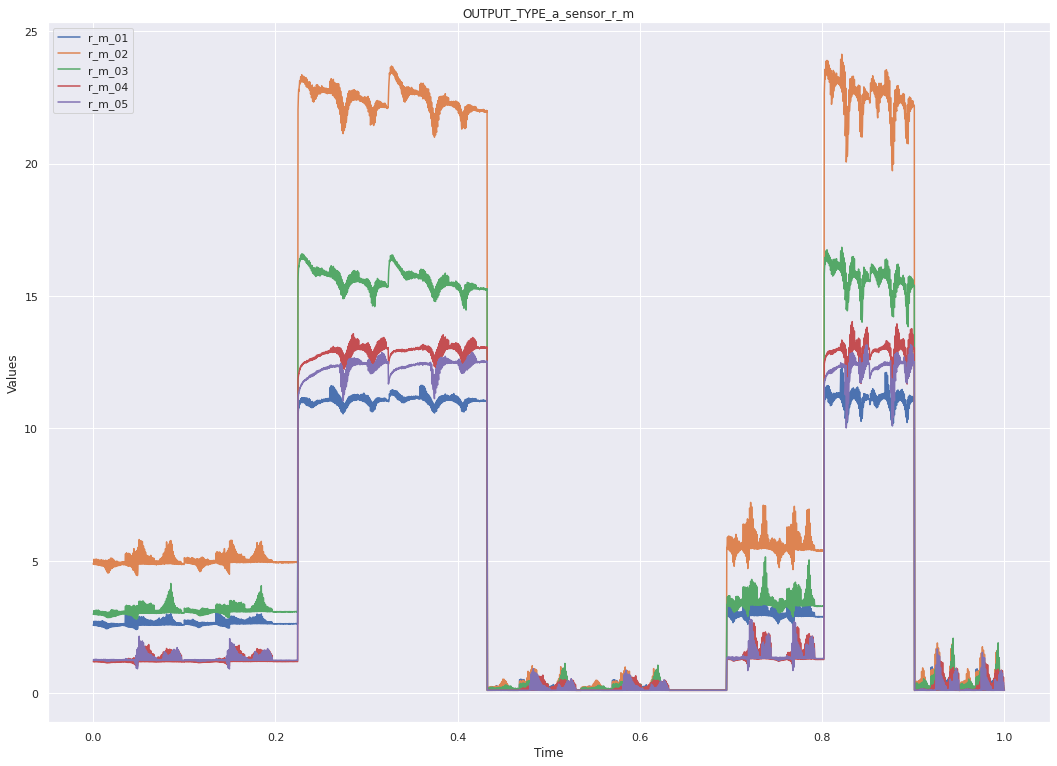

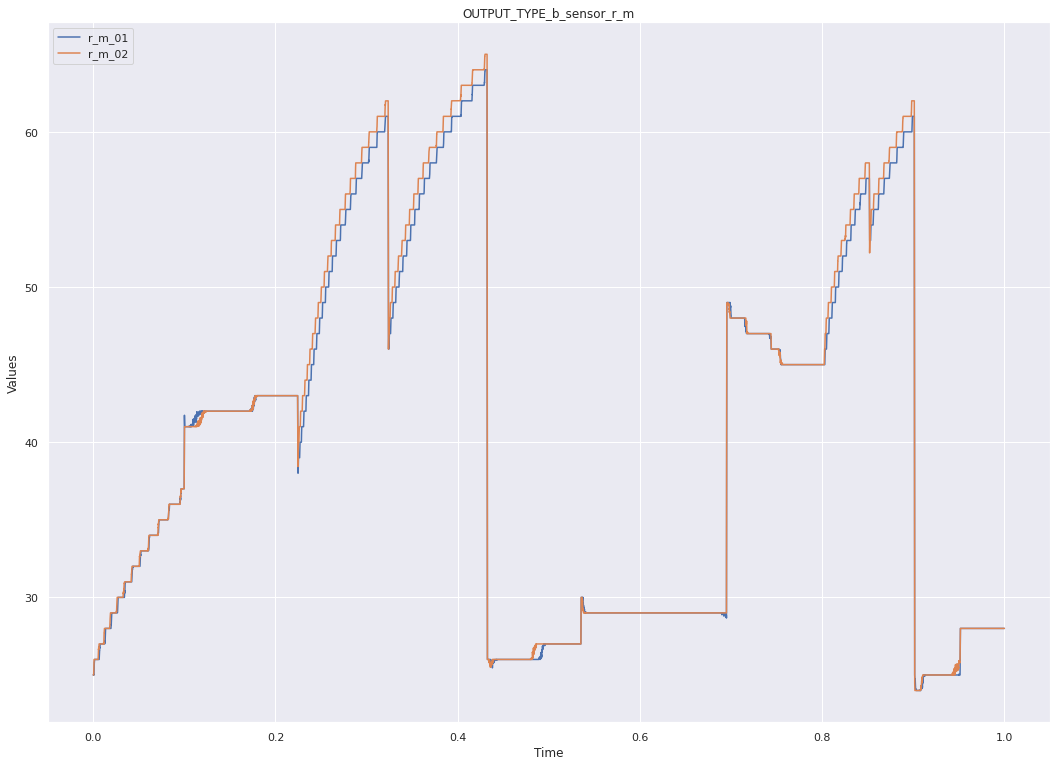

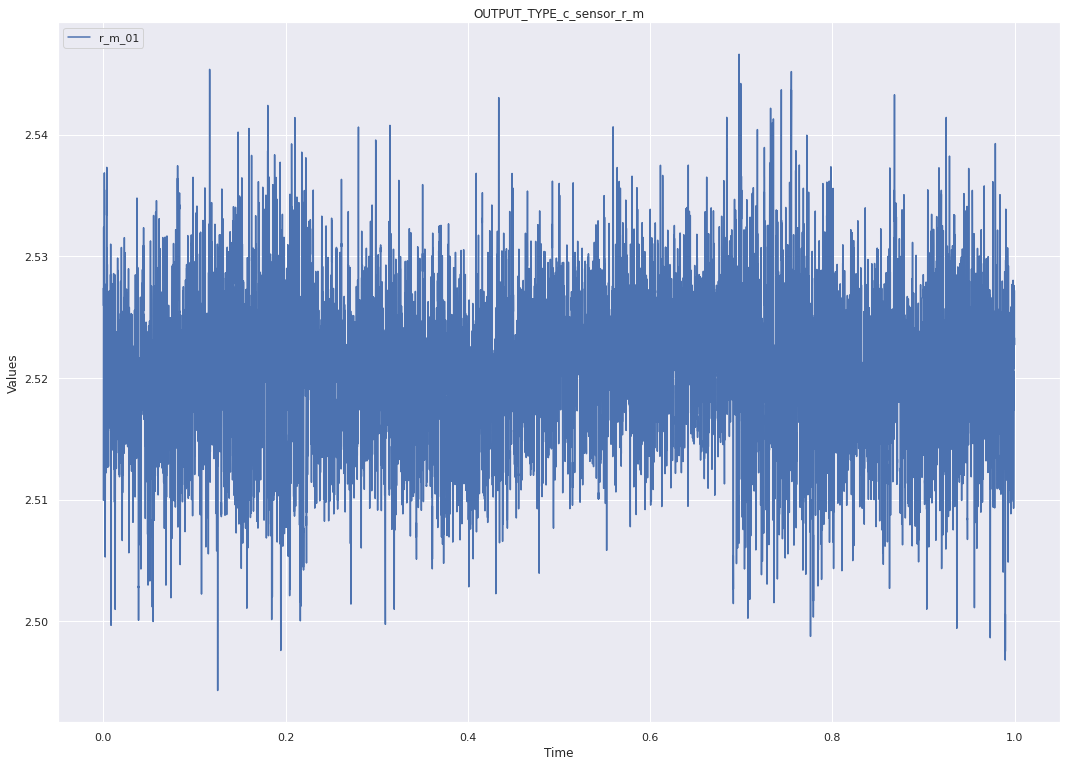

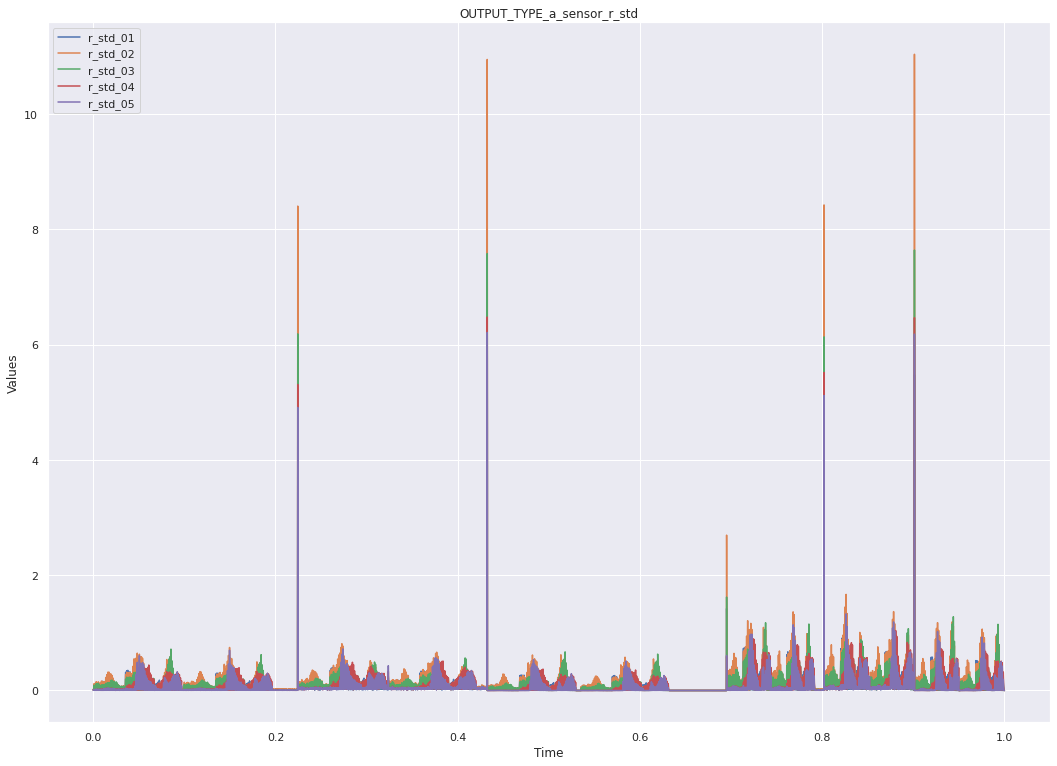

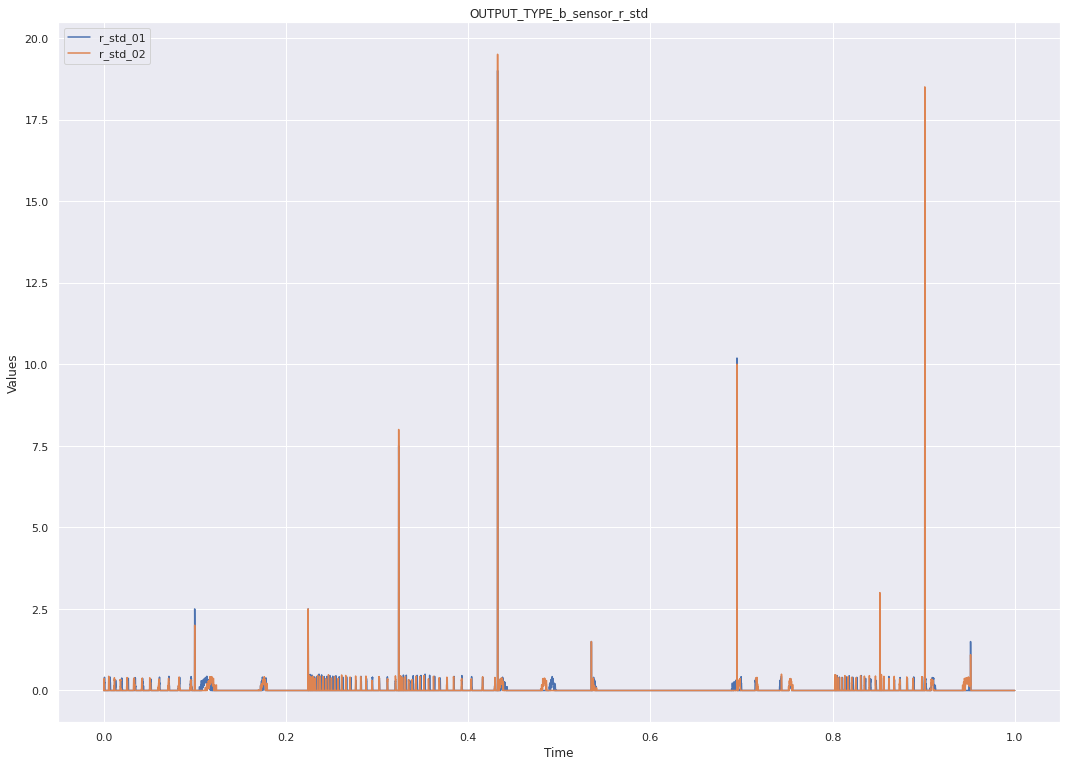

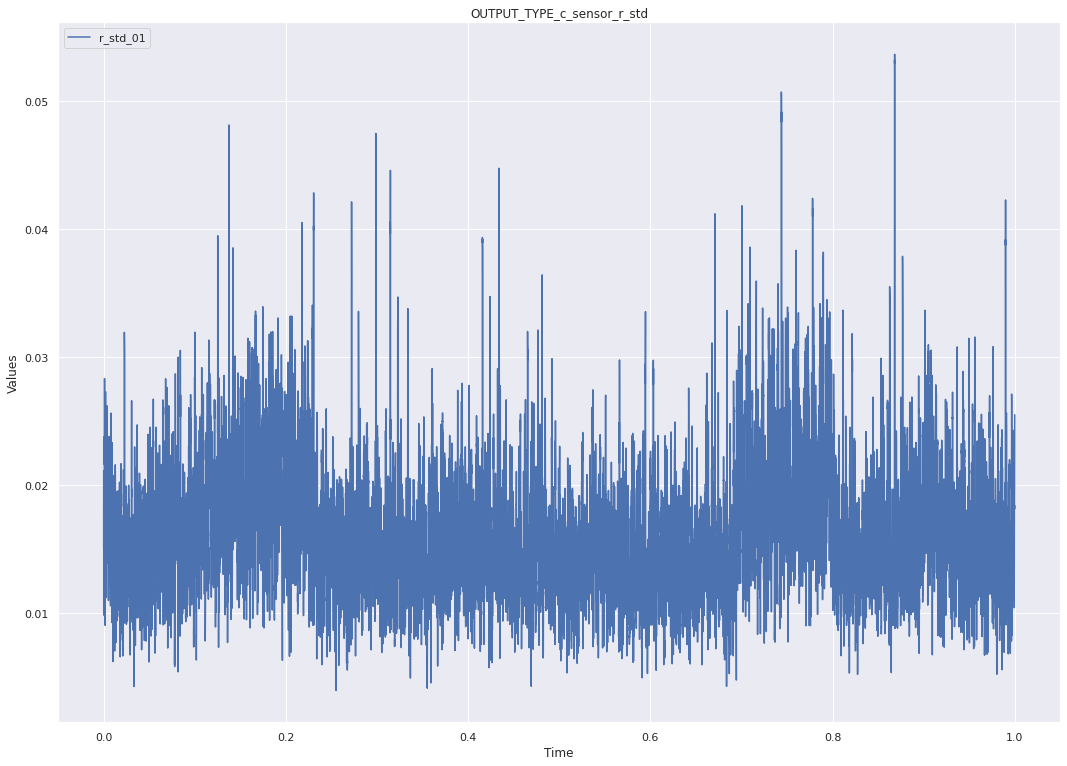

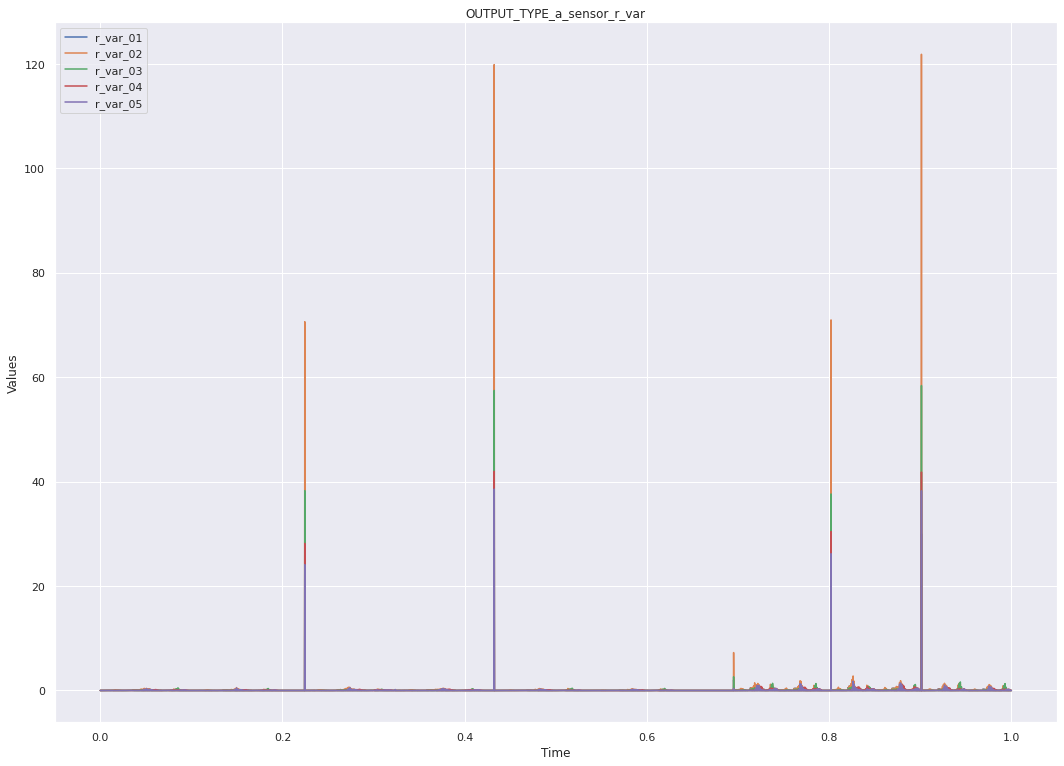

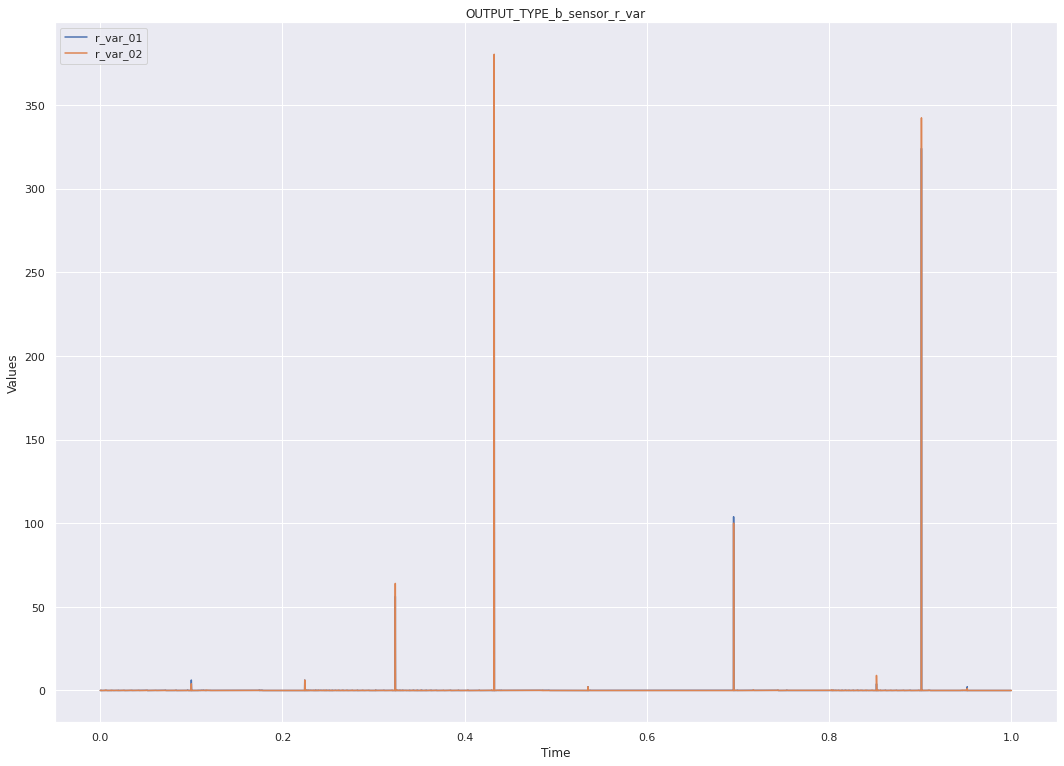

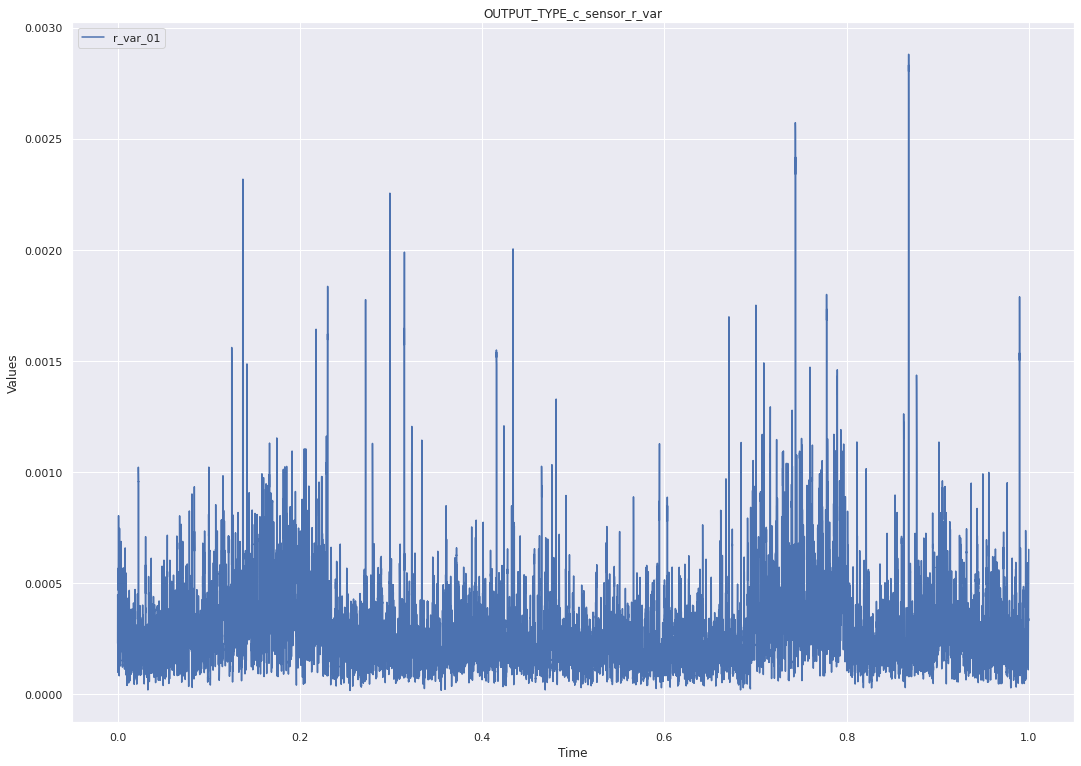

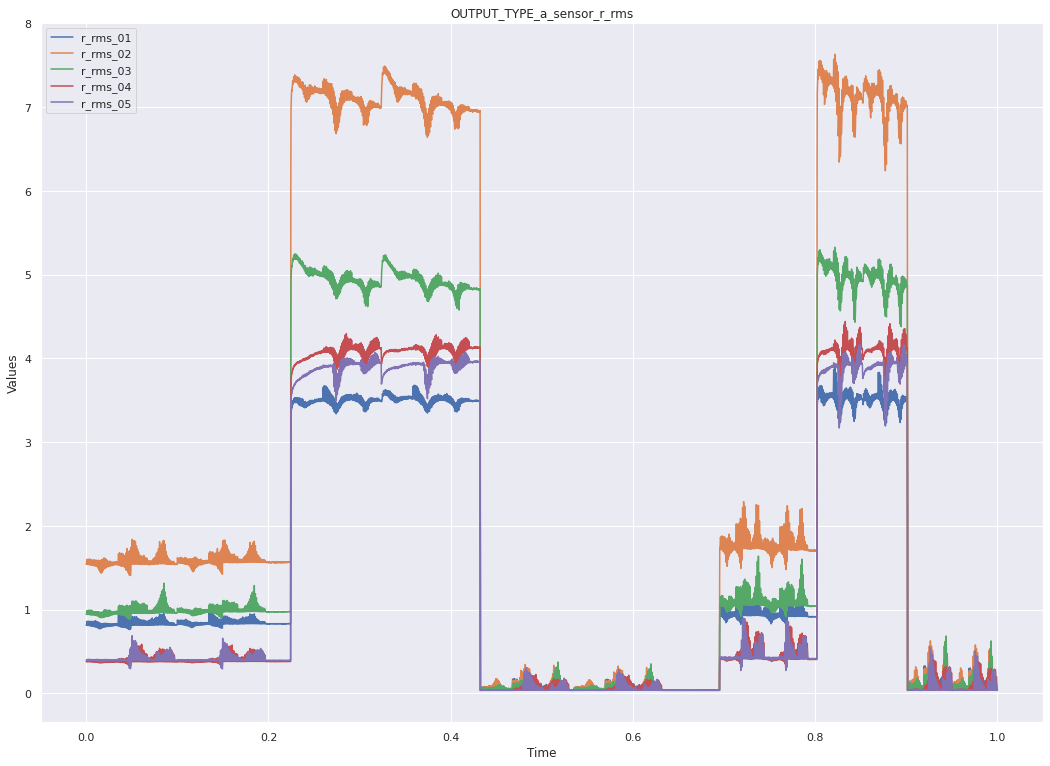

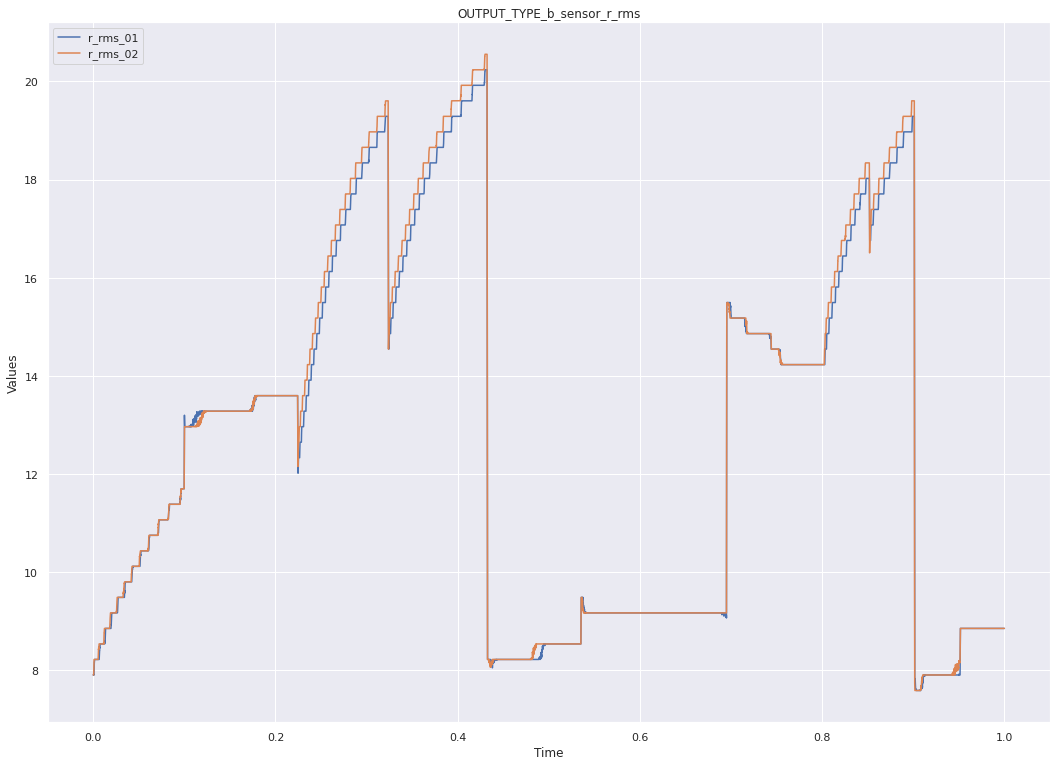

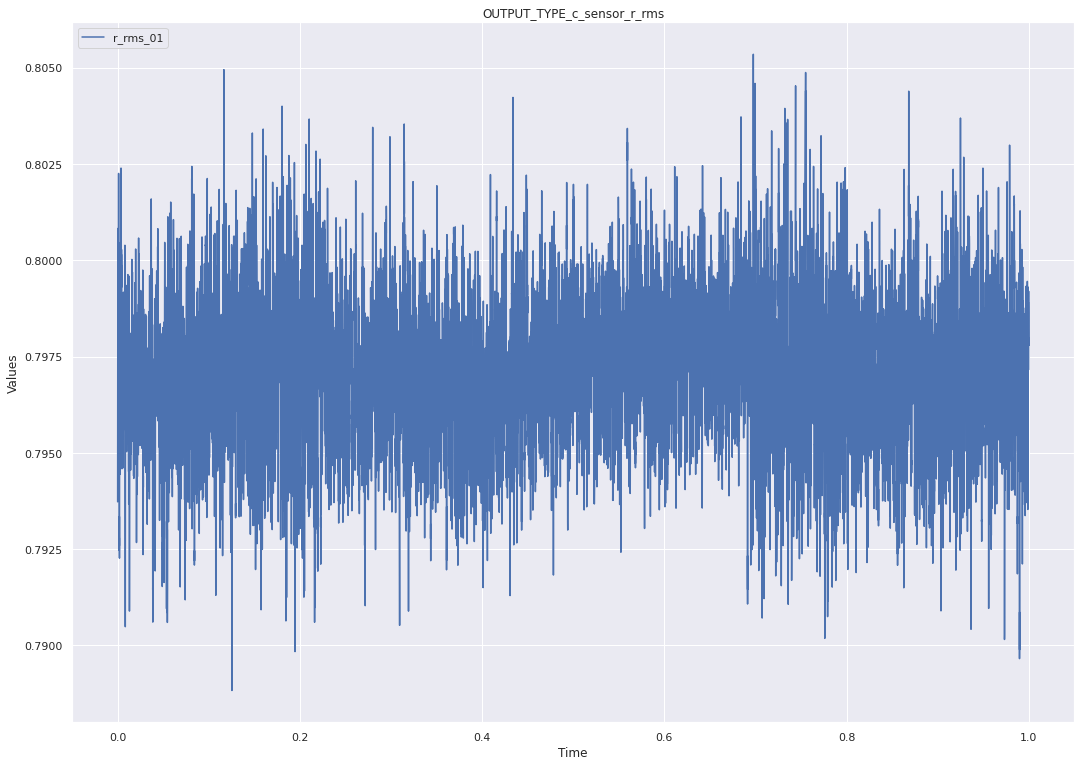

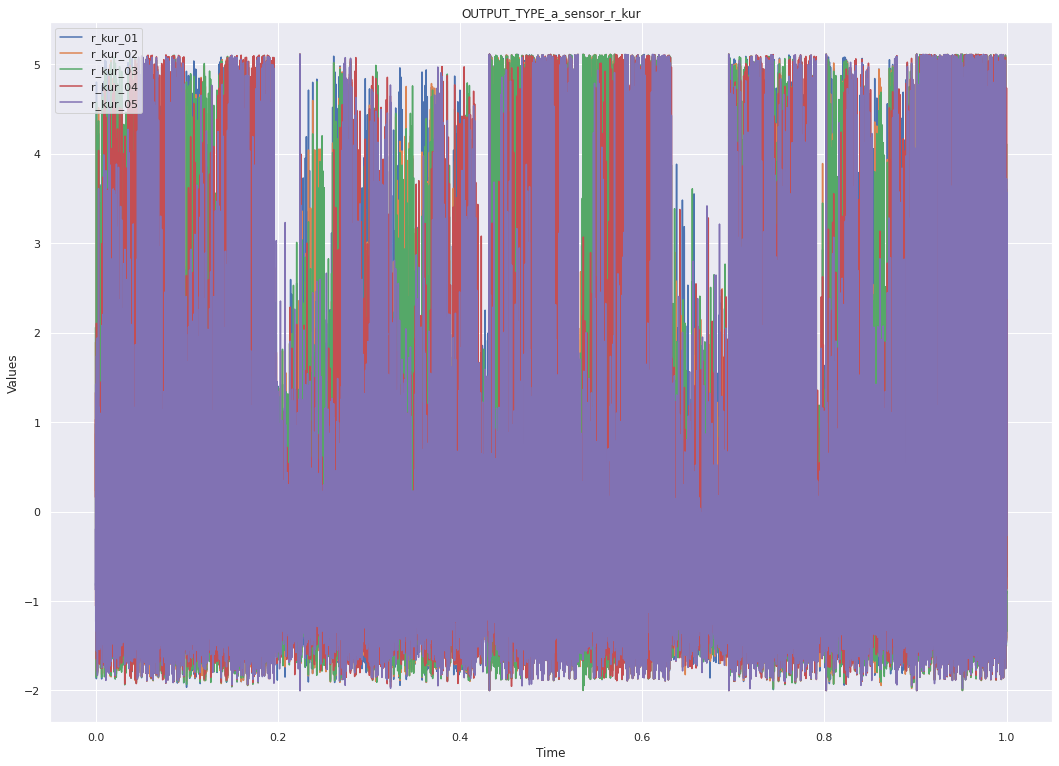

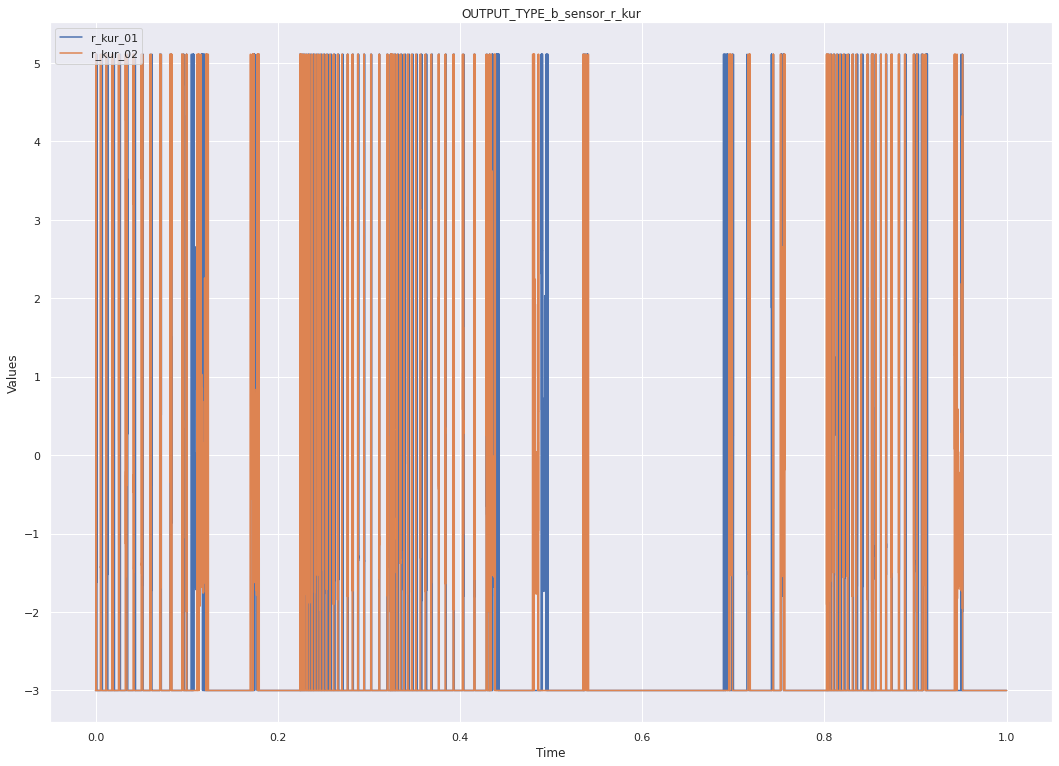

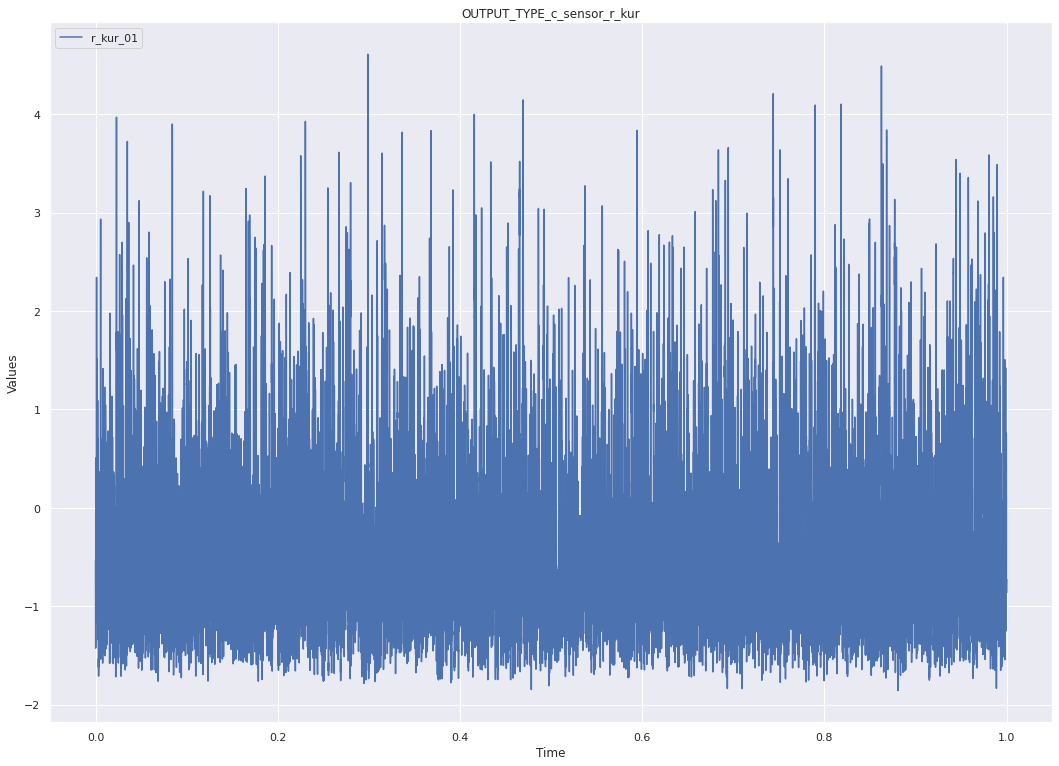

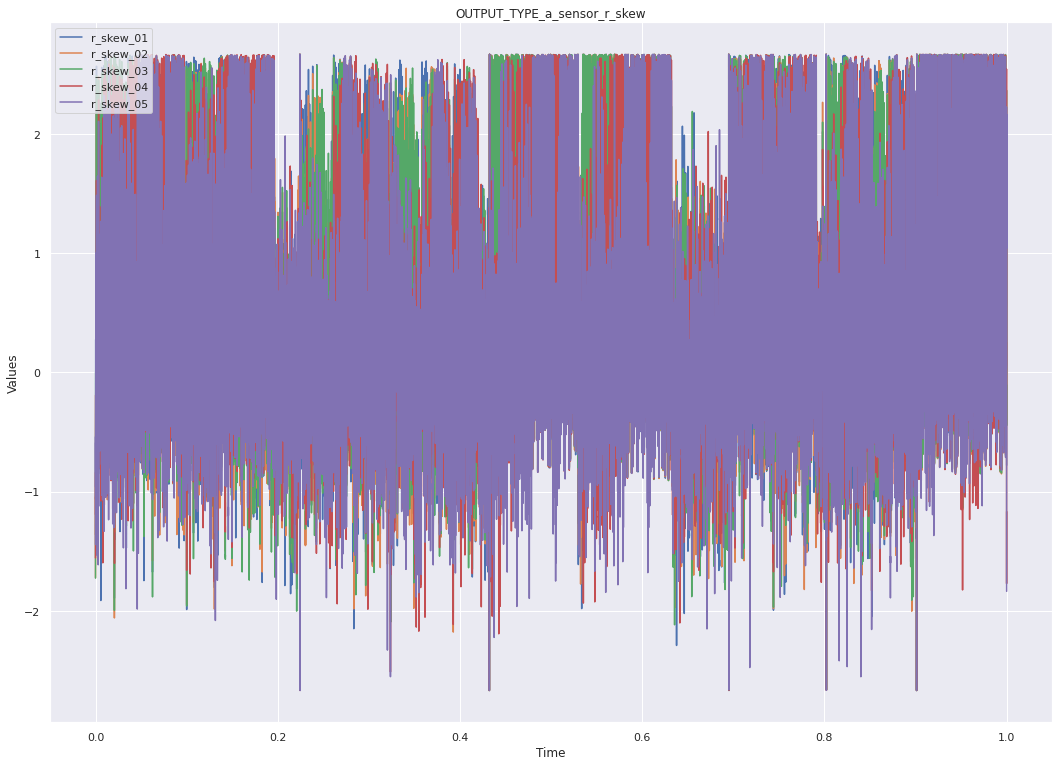

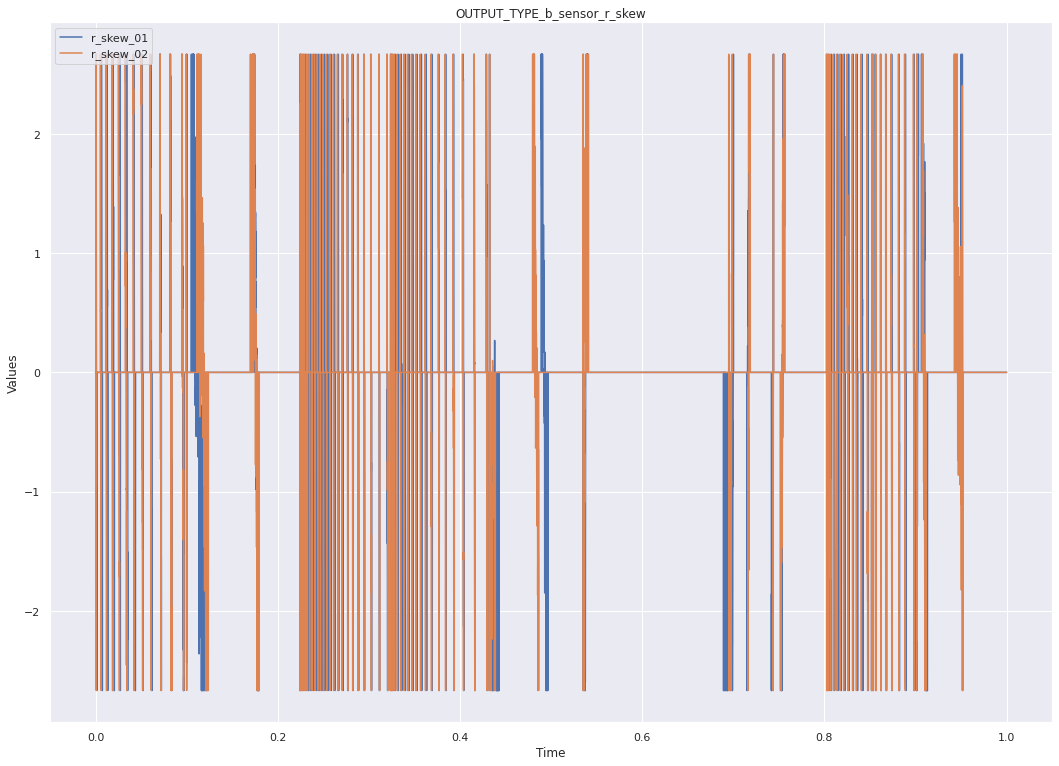

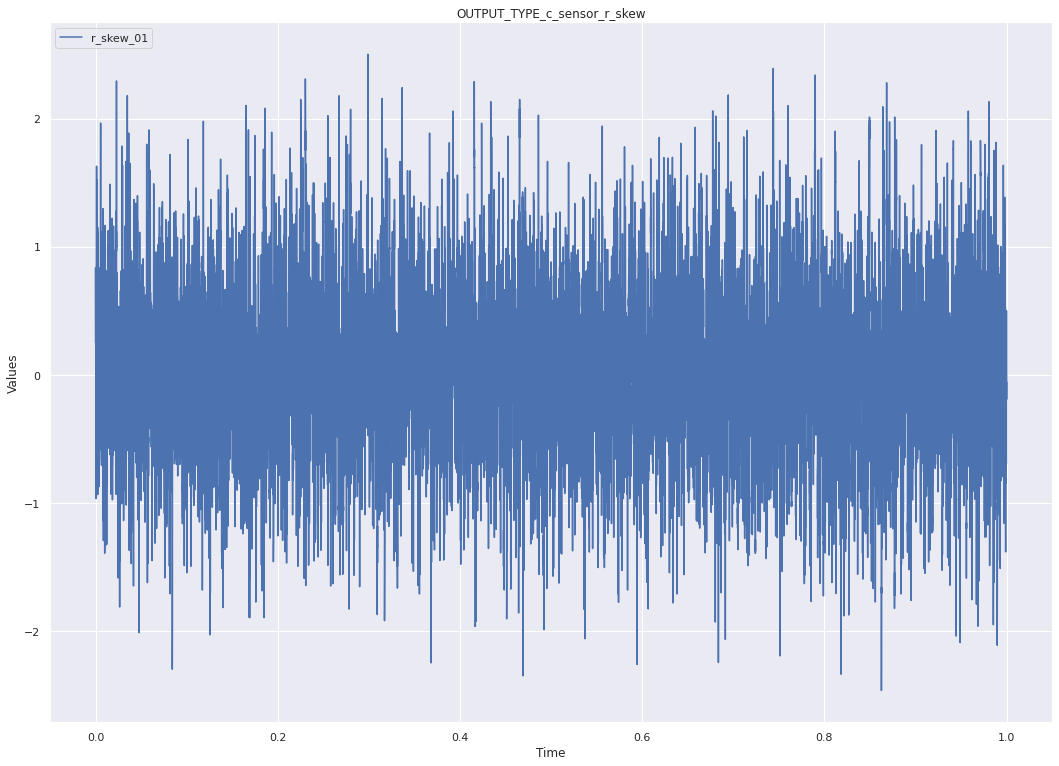

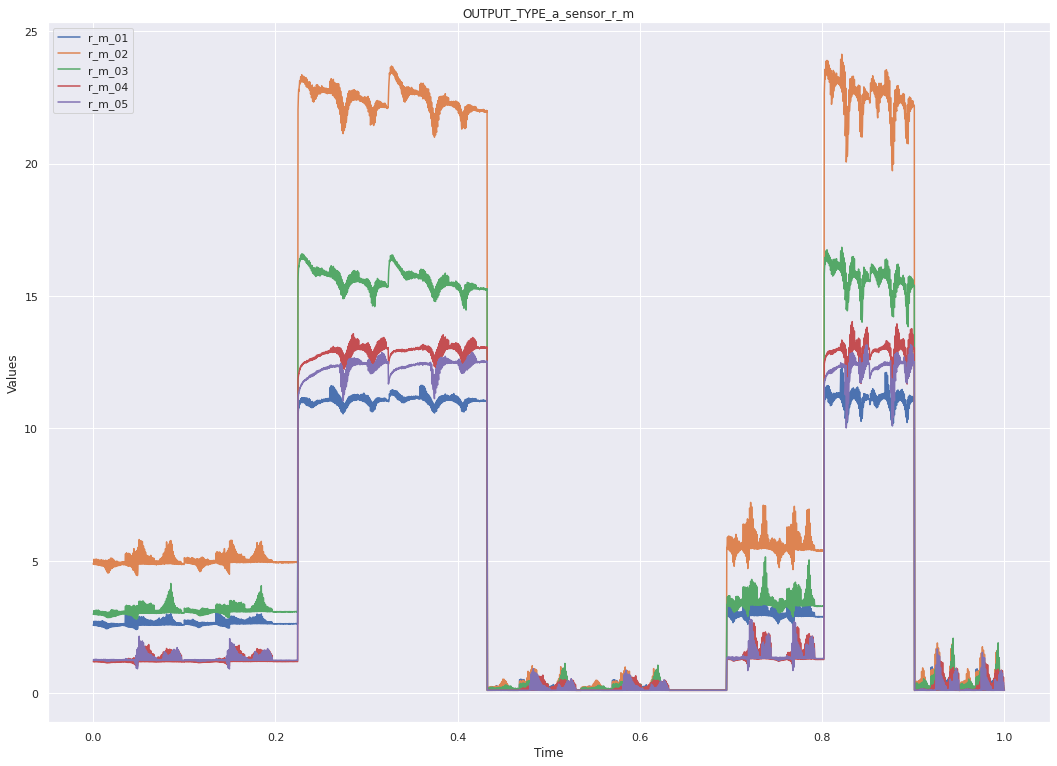

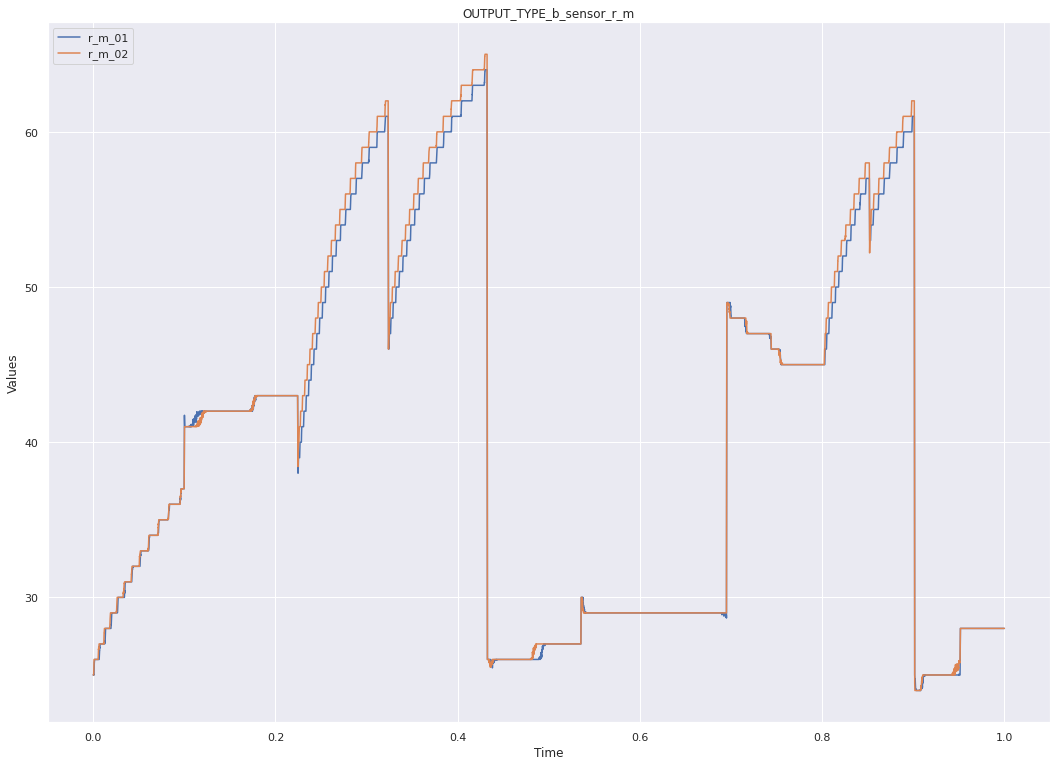

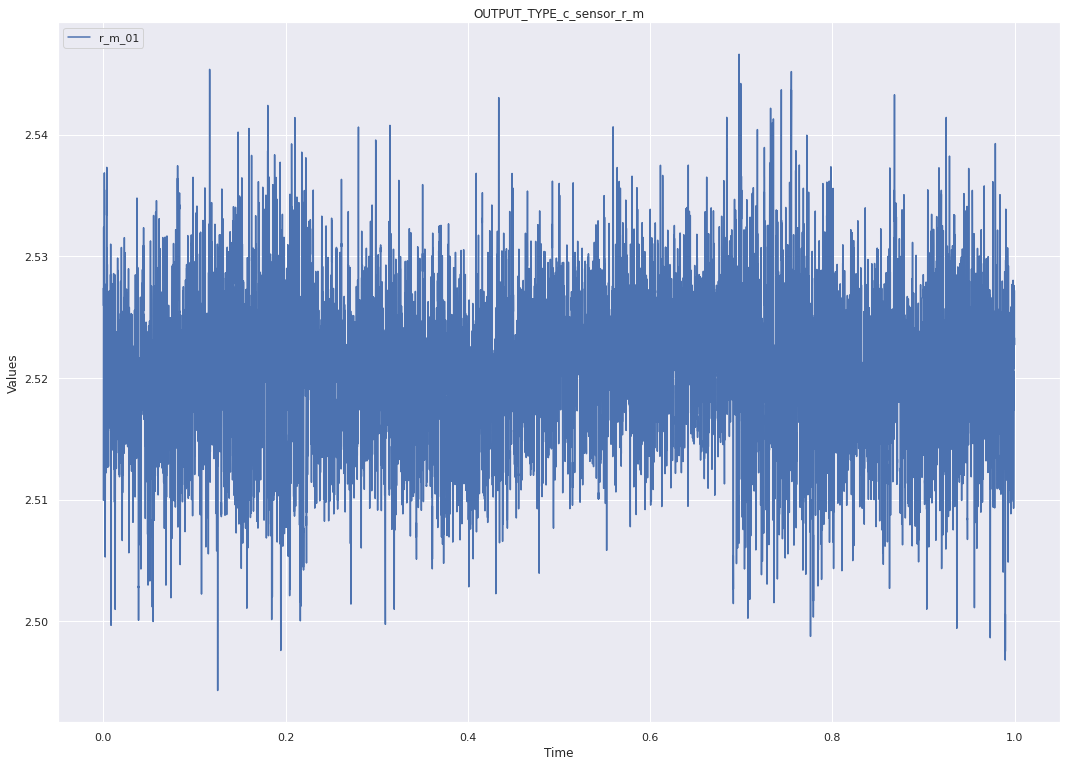

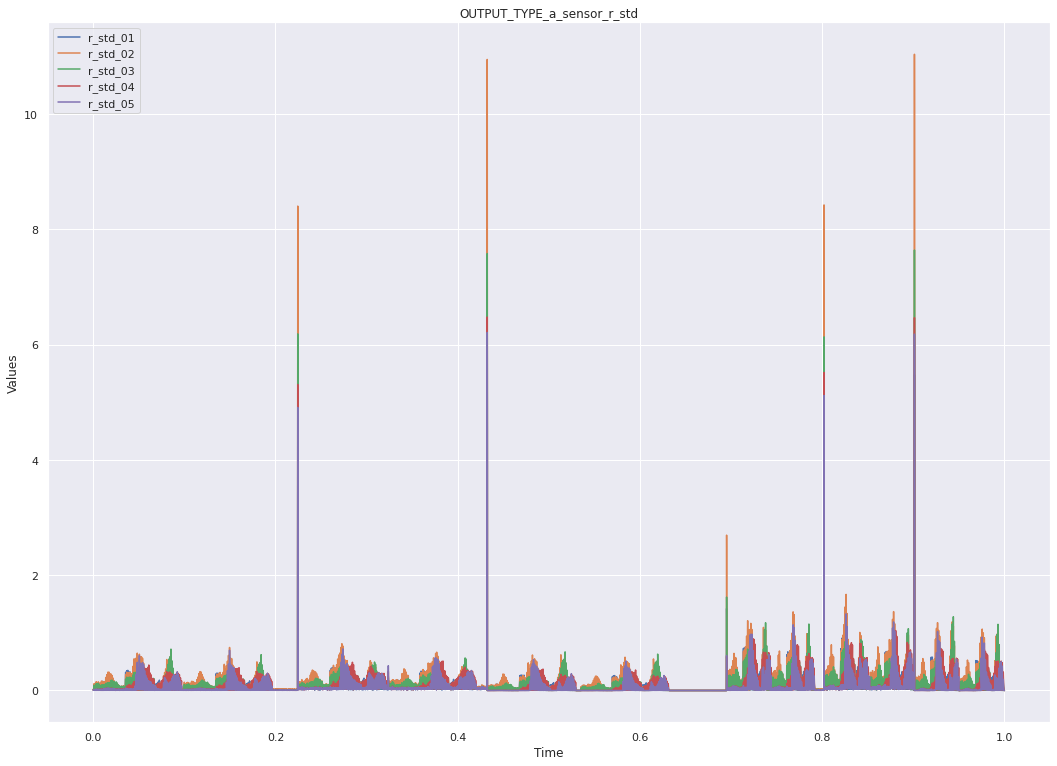

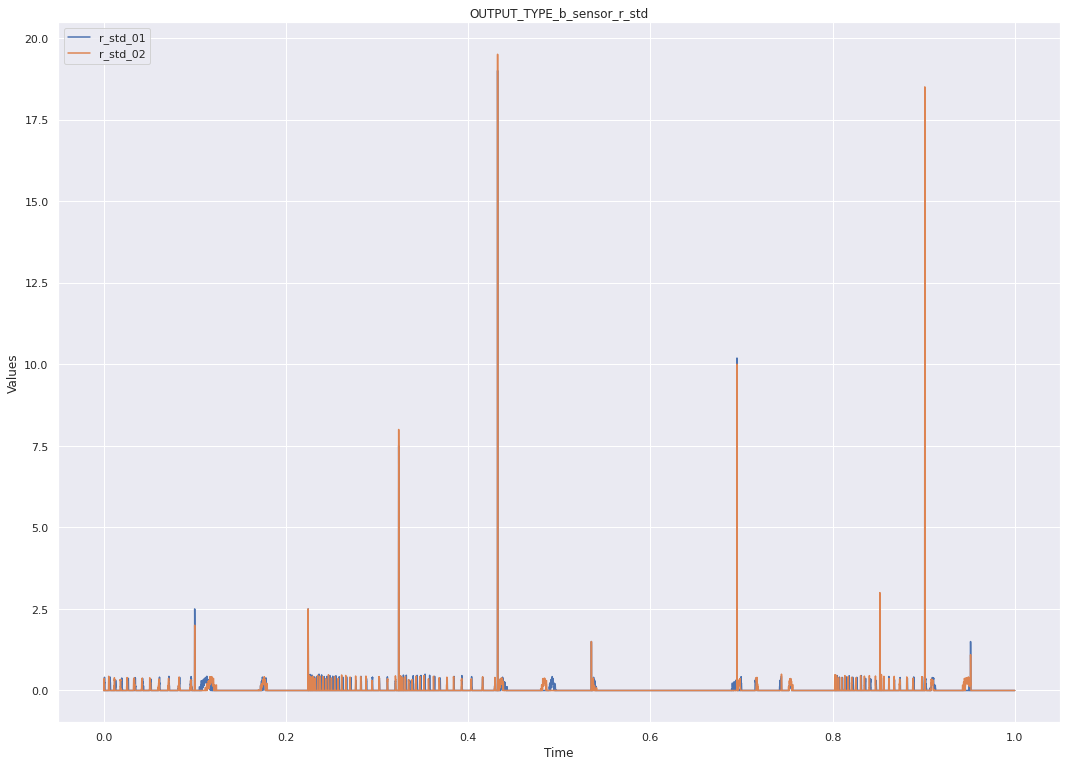

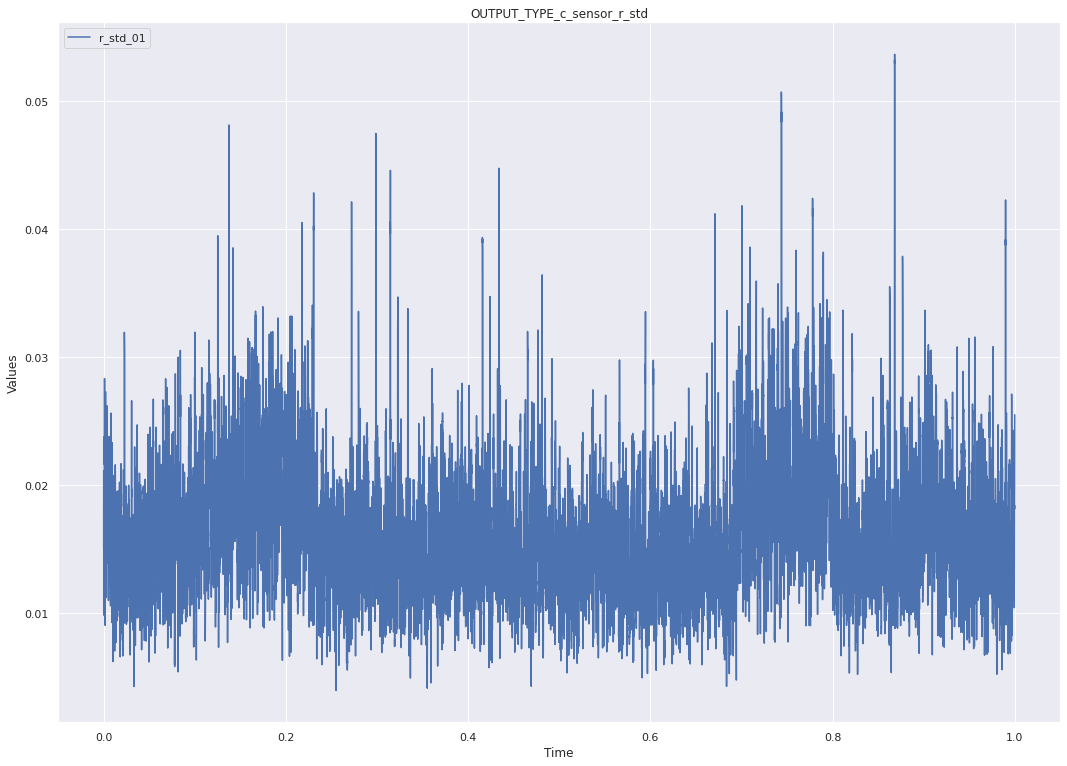

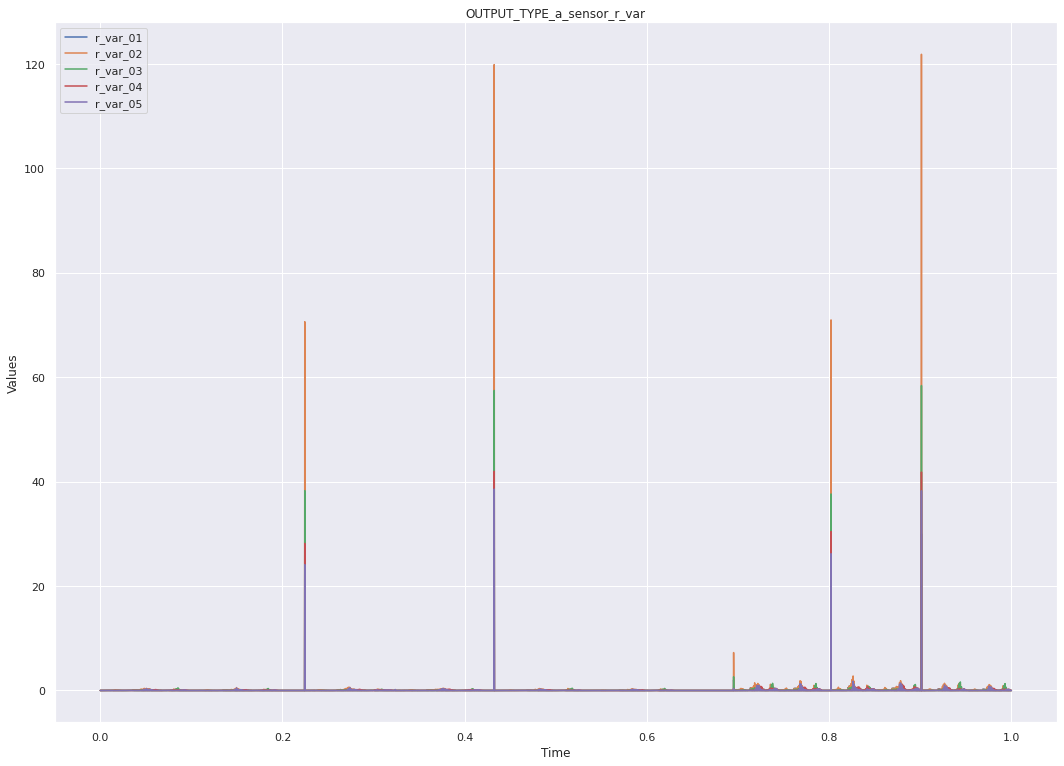

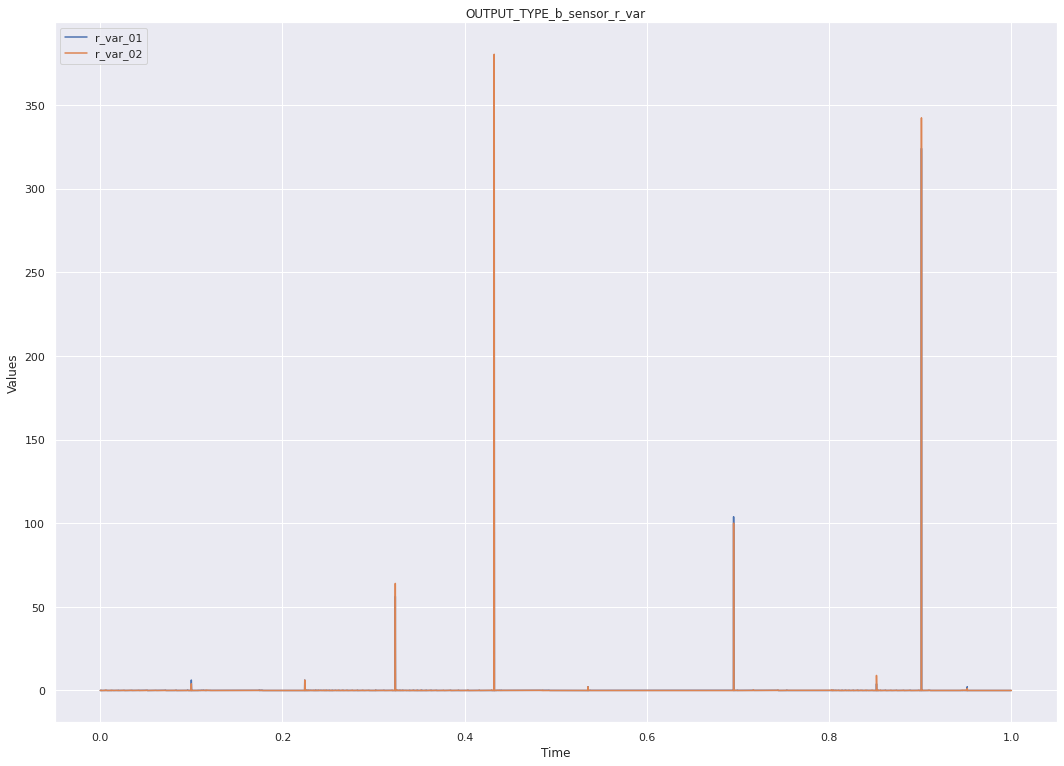

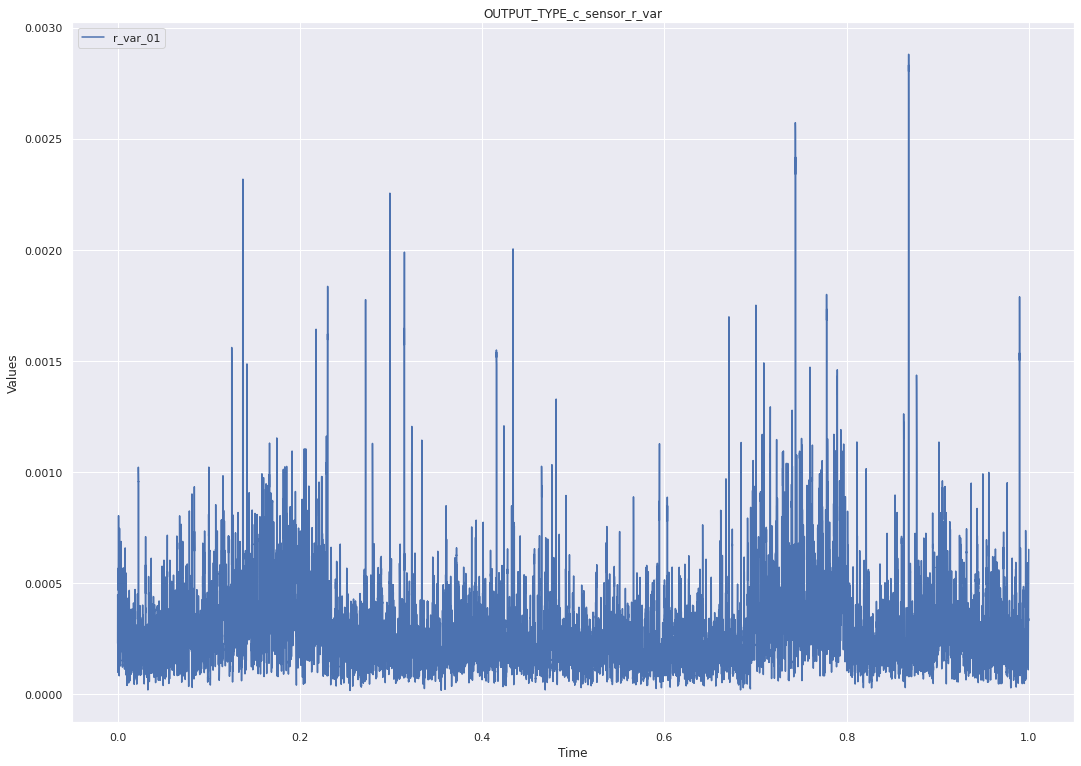

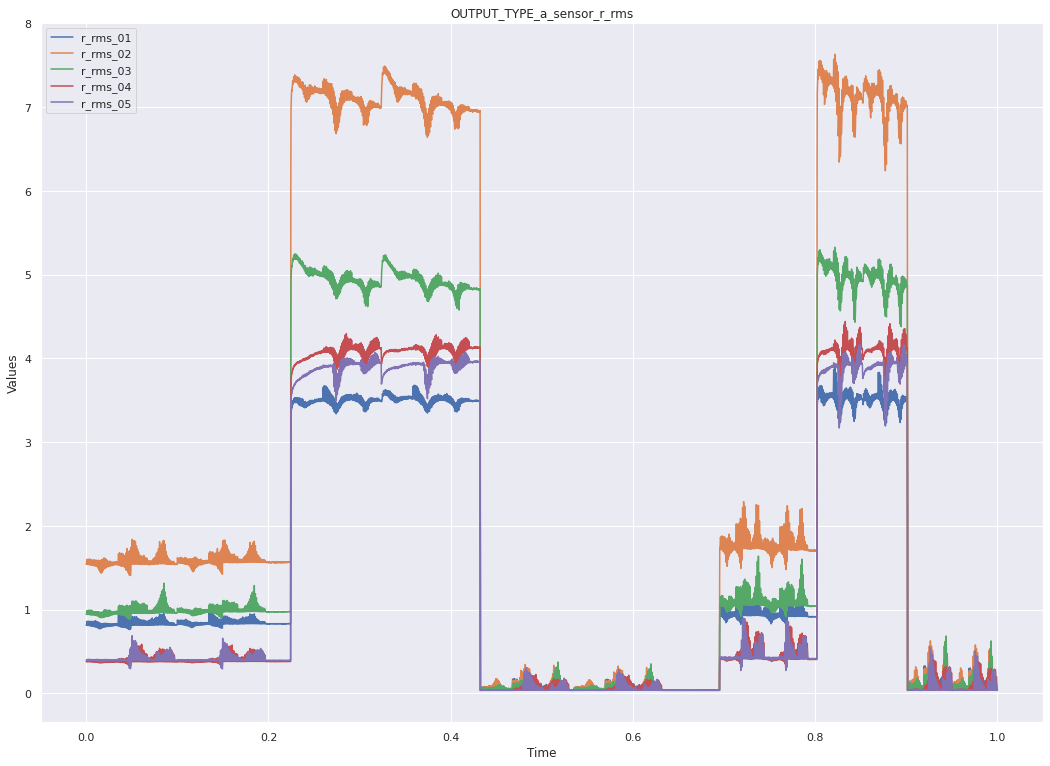

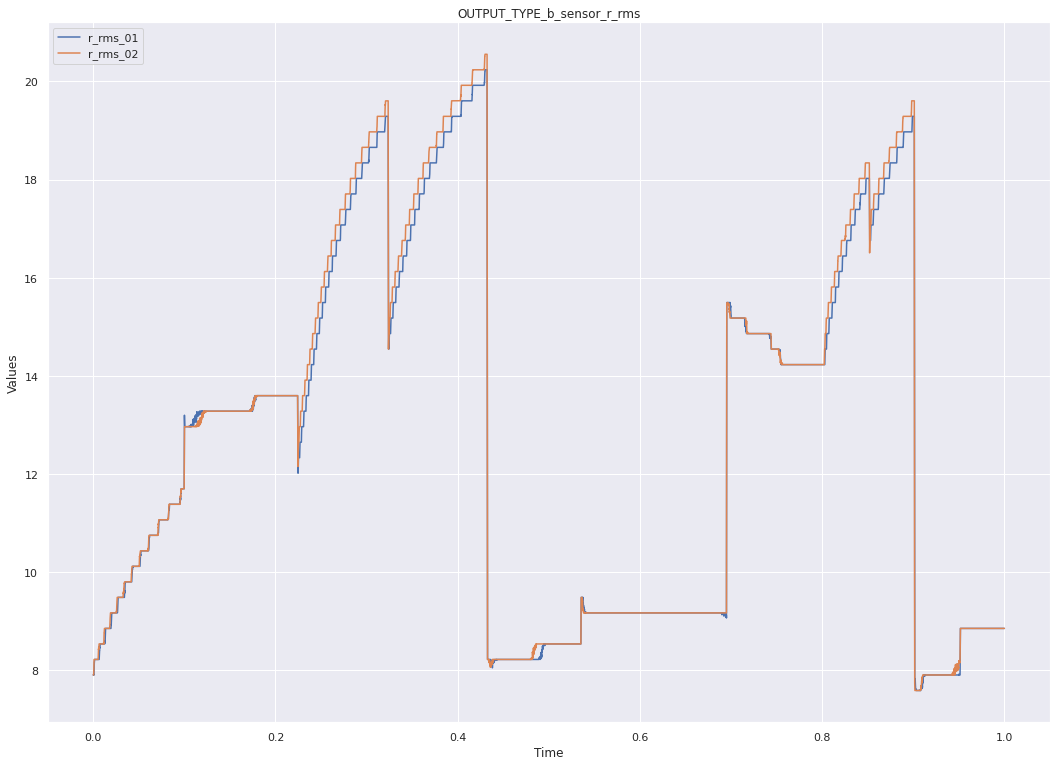

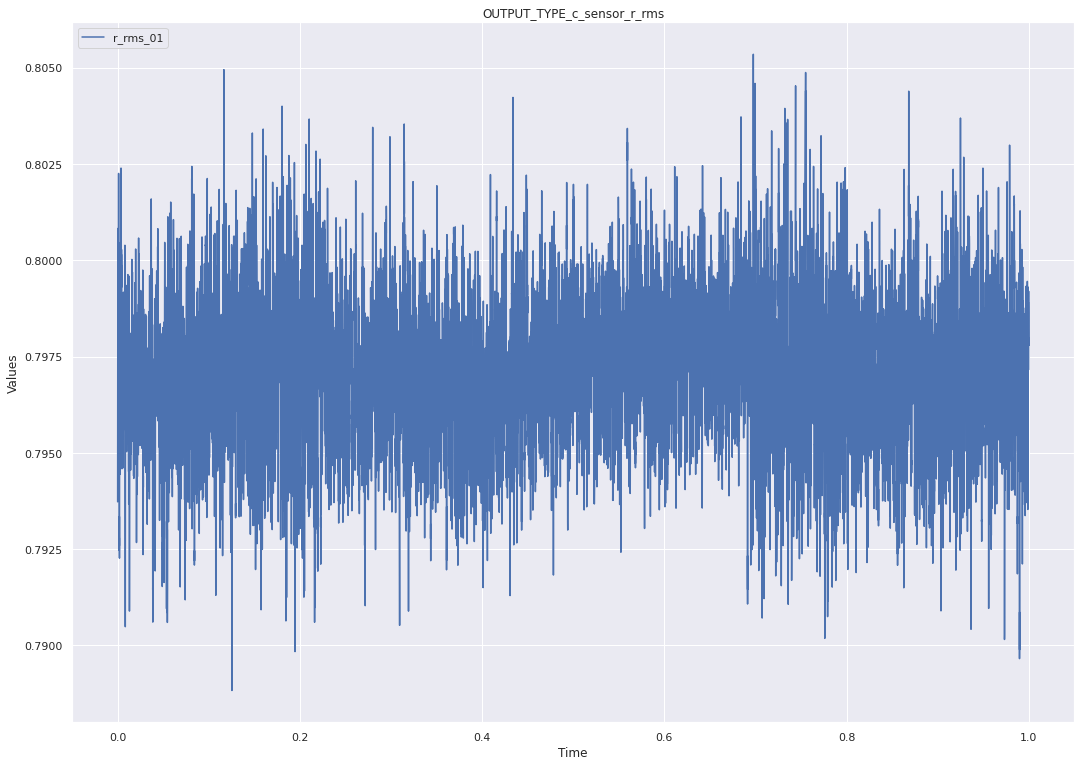

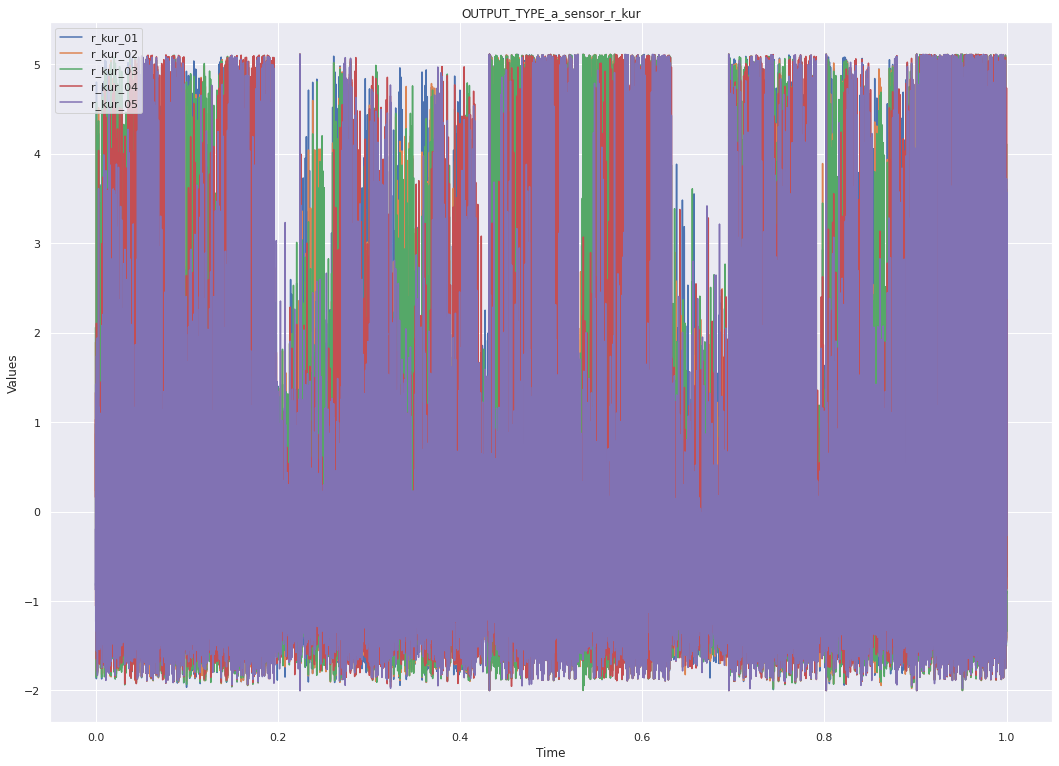

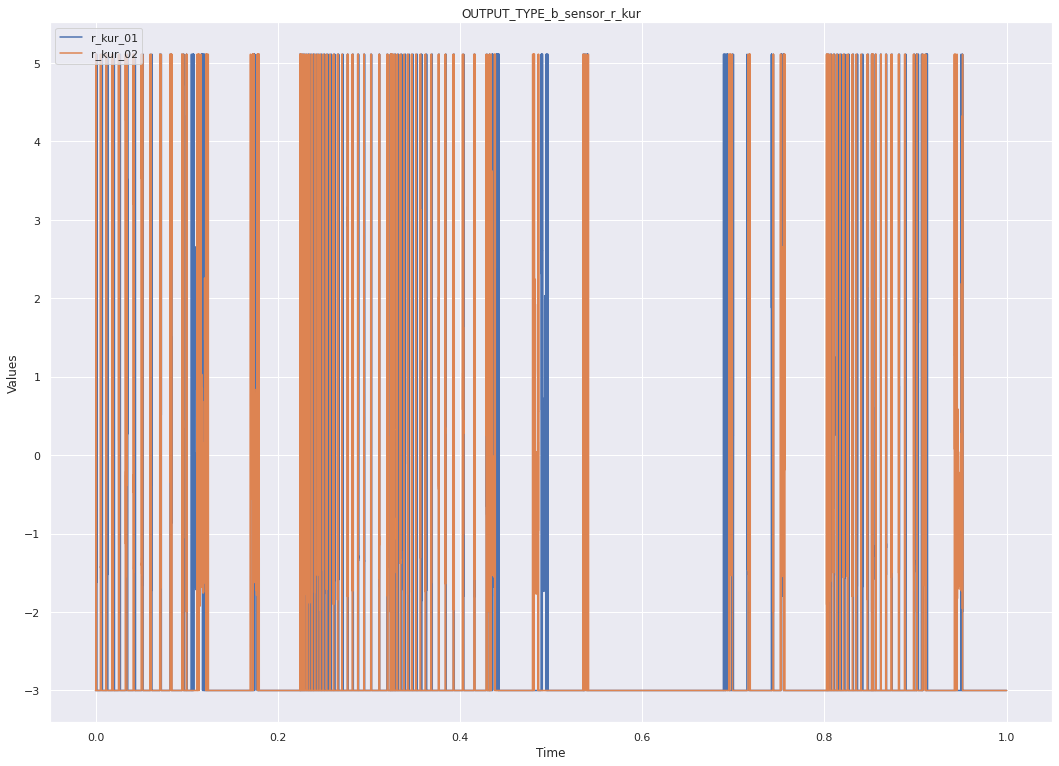

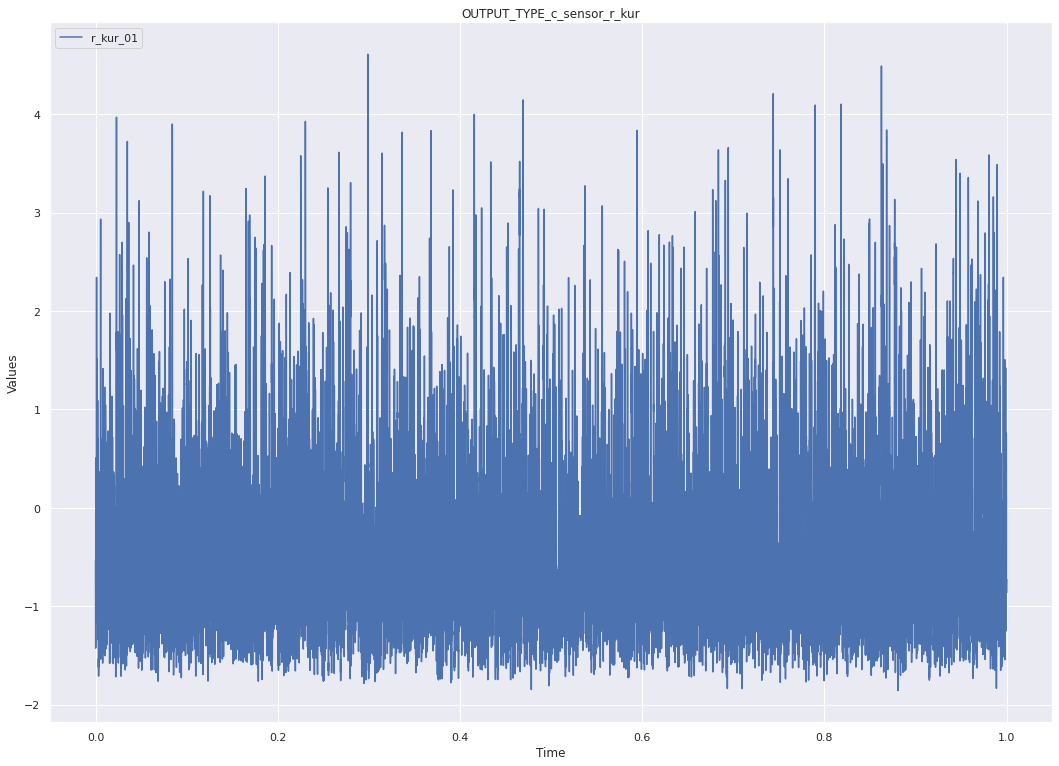

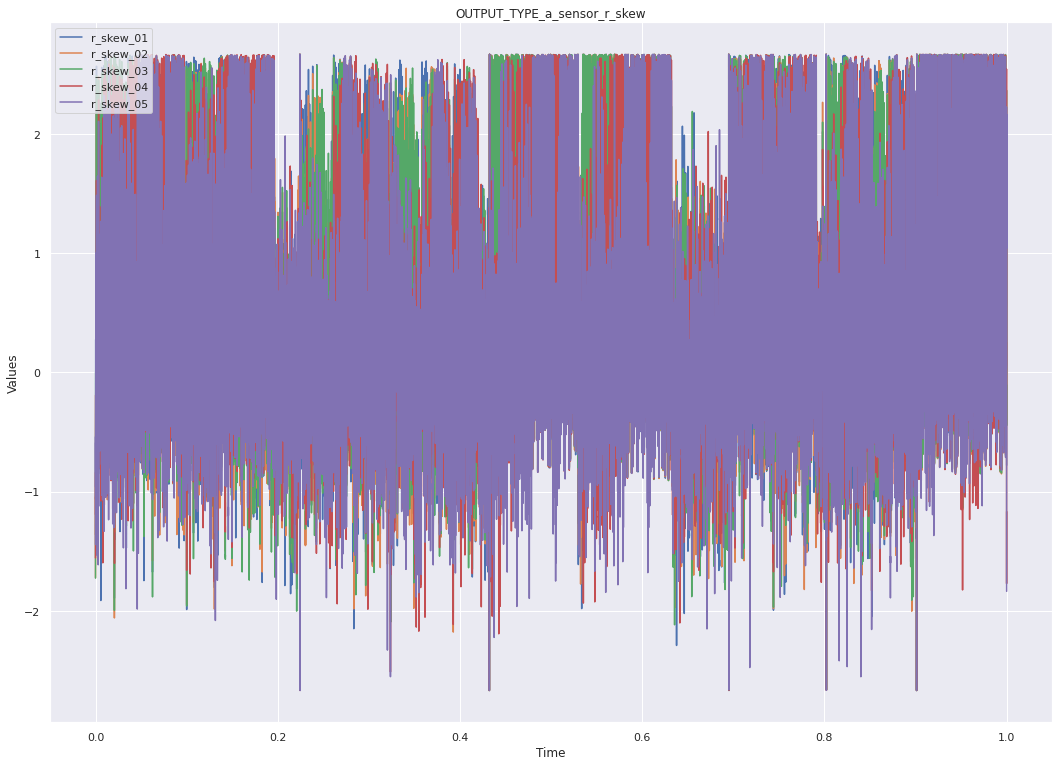

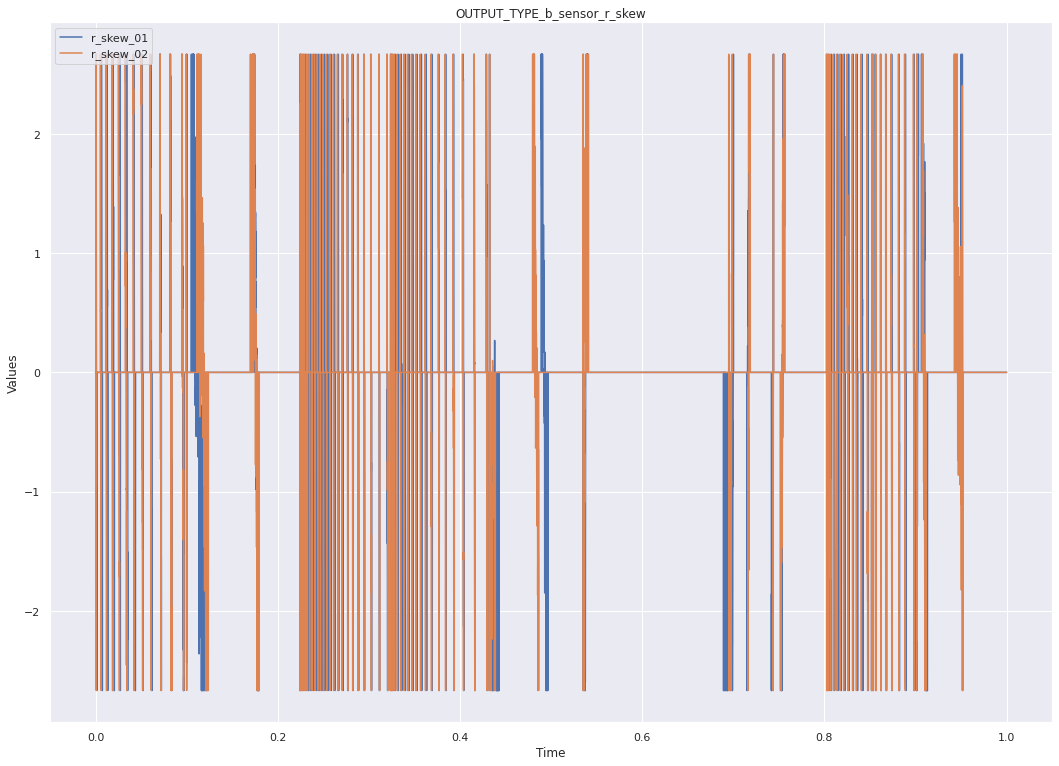

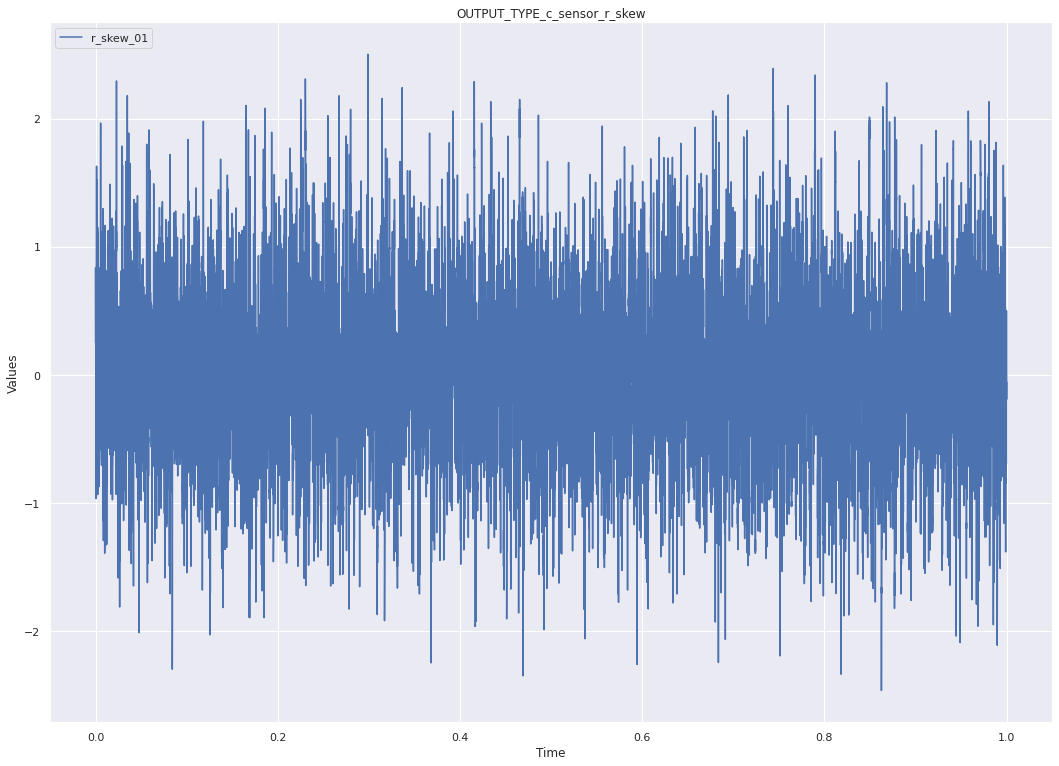

In [59]:
for model in model_names:
  for i,sensor in enumerate(sensor_names):
    plot_graph(sensor, model, sensor_fields[i])
